# Import the Libraries

In [1]:
import numpy as np # for working with arrays in python
import pandas as pd # for reading the files
import matplotlib.pyplot as plt # for plotting different types of graphs
from sklearn.linear_model import LinearRegression # importing linear regression model from sklearn
from sklearn.metrics import r2_score # for calculating r2 value to predict the accuracy of the model
import statsmodels.formula.api as smf # A convenient interface for specifying models using formula strings and dataframe

# Data Collection and Preprocessing

In [2]:
dataset = pd.read_csv('Salary_Data.csv') # reading the csv file from the source

print(dataset.shape) # size of the dataset (no. of rows, columns)
print("="*30)

print(dataset.head(10)) # top 10 records of the dataset

(30, 2)
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
5              2.9  56642.0
6              3.0  60150.0
7              3.2  54445.0
8              3.2  64445.0
9              3.7  57189.0


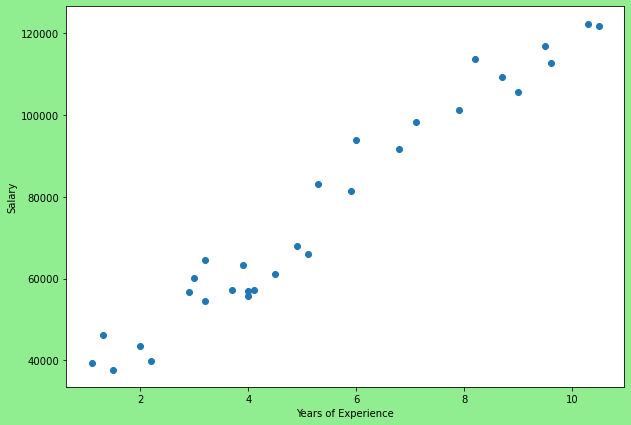

In [3]:
plt.figure(figsize=(10,7), facecolor='lightgreen')# creating a figure of figure size 10,7 with lightgreen color
plt.scatter(dataset.YearsExperience,dataset.Salary) # plotting the scatter plot with x-axis as Years of Exp and y-axis as Salary
plt.xlabel('Years of Experience') # label of x-axis
plt.ylabel('Salary') # label of y-axis
plt.show() # to print the graph

In [5]:
dataset.corr() # near to 1 means positive correlation whereas near to 0 means negative correlation

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Creating Model with Sklearn

In [6]:
dataset['YearsExperience'].values.reshape(-1,1).shape # reshaping the data with one feature

(30, 1)

In [7]:
lin_reg = LinearRegression() # giving alias to the linear regression model
X = dataset['YearsExperience'].values.reshape(-1,1) # the library can't take the data as it is and ro that we have to change it to numpy array
Y = dataset['Salary'].values.reshape(-1,1) # -1 internally decides the number of rows according to the number of columns 
reg_sklearn = lin_reg.fit(X,Y)

In [8]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [9]:
print(Y)

[[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]
 [ 56642.]
 [ 60150.]
 [ 54445.]
 [ 64445.]
 [ 57189.]
 [ 63218.]
 [ 55794.]
 [ 56957.]
 [ 57081.]
 [ 61111.]
 [ 67938.]
 [ 66029.]
 [ 83088.]
 [ 81363.]
 [ 93940.]
 [ 91738.]
 [ 98273.]
 [101302.]
 [113812.]
 [109431.]
 [105582.]
 [116969.]
 [112635.]
 [122391.]
 [121872.]]


In [10]:
print(reg_sklearn.coef_) # alpha of y = ax+b
print(reg_sklearn.intercept_) # beta of y = ax+b

[[9449.96232146]]
[25792.20019867]


In [11]:
reg_sklearn.predict(X) # predicting y' using X in the table

array([[ 36187.15875227],
       [ 38077.15121656],
       [ 39967.14368085],
       [ 44692.12484158],
       [ 46582.11730587],
       [ 53197.09093089],
       [ 54142.08716303],
       [ 56032.07962732],
       [ 56032.07962732],
       [ 60757.06078805],
       [ 62647.05325234],
       [ 63592.04948449],
       [ 63592.04948449],
       [ 64537.04571663],
       [ 68317.03064522],
       [ 72097.0155738 ],
       [ 73987.00803809],
       [ 75877.00050238],
       [ 81546.97789525],
       [ 82491.9741274 ],
       [ 90051.94398456],
       [ 92886.932681  ],
       [100446.90253816],
       [103281.8912346 ],
       [108006.87239533],
       [110841.86109176],
       [115566.84225249],
       [116511.83848464],
       [123126.81210966],
       [125016.80457395]])

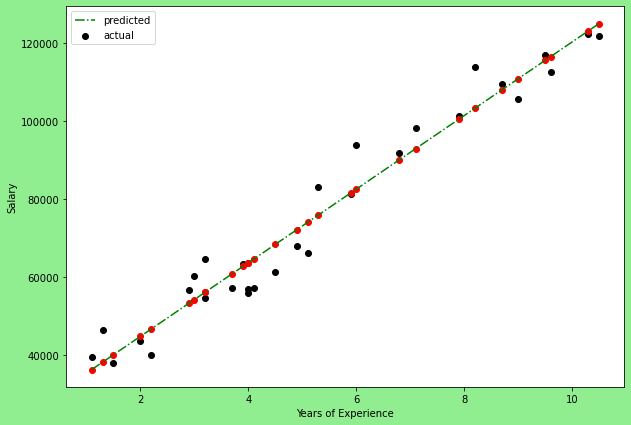

In [12]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(dataset.YearsExperience,(dataset.Salary),color="black",label="actual");
plt.plot(dataset.YearsExperience,reg_sklearn.predict(X),label="predicted",color="green",linestyle="-.");
plt.scatter(dataset.YearsExperience,reg_sklearn.predict(X),color="red")
plt.xlabel("Years of Experience");
plt.ylabel("Salary")
# print (wcat.AT)
plt.legend(loc="best")
plt.show()

# Model Validation

In [13]:
pred_train_lm = reg_sklearn.predict(X)
r2_score(dataset['Salary'],pred_train_lm)

0.9569566641435086

# Model with Statsmodels

In [16]:
first_model = smf.ols("Salary~YearsExperience",data=dataset).fit()

In [17]:
first_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [18]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           1.14e-20
Time:                        00:14:23   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

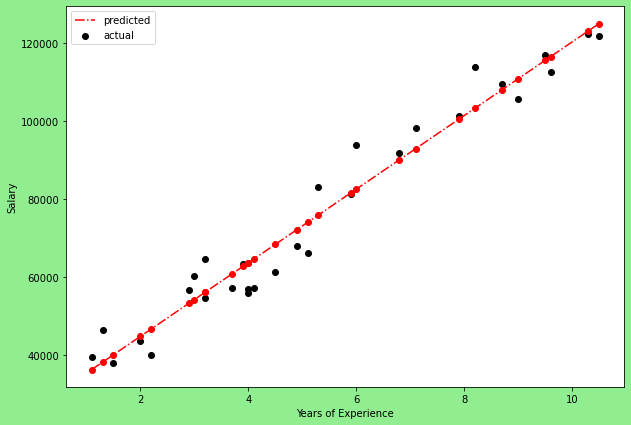

In [19]:
plt.figure(figsize=(10,7),facecolor='lightgreen')
plt.scatter(dataset.YearsExperience,(dataset.Salary), color="black",label="actual")
plt.plot(dataset.YearsExperience,first_model.predict(dataset['YearsExperience']),label="predicted",color="red",linestyle="-.")
plt.scatter(dataset.YearsExperience,first_model.predict(dataset['YearsExperience']),color="red")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(loc="best")
plt.show()

In [20]:
first_model.predict(dataset[["YearsExperience","Salary"]])

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64